In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [38]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

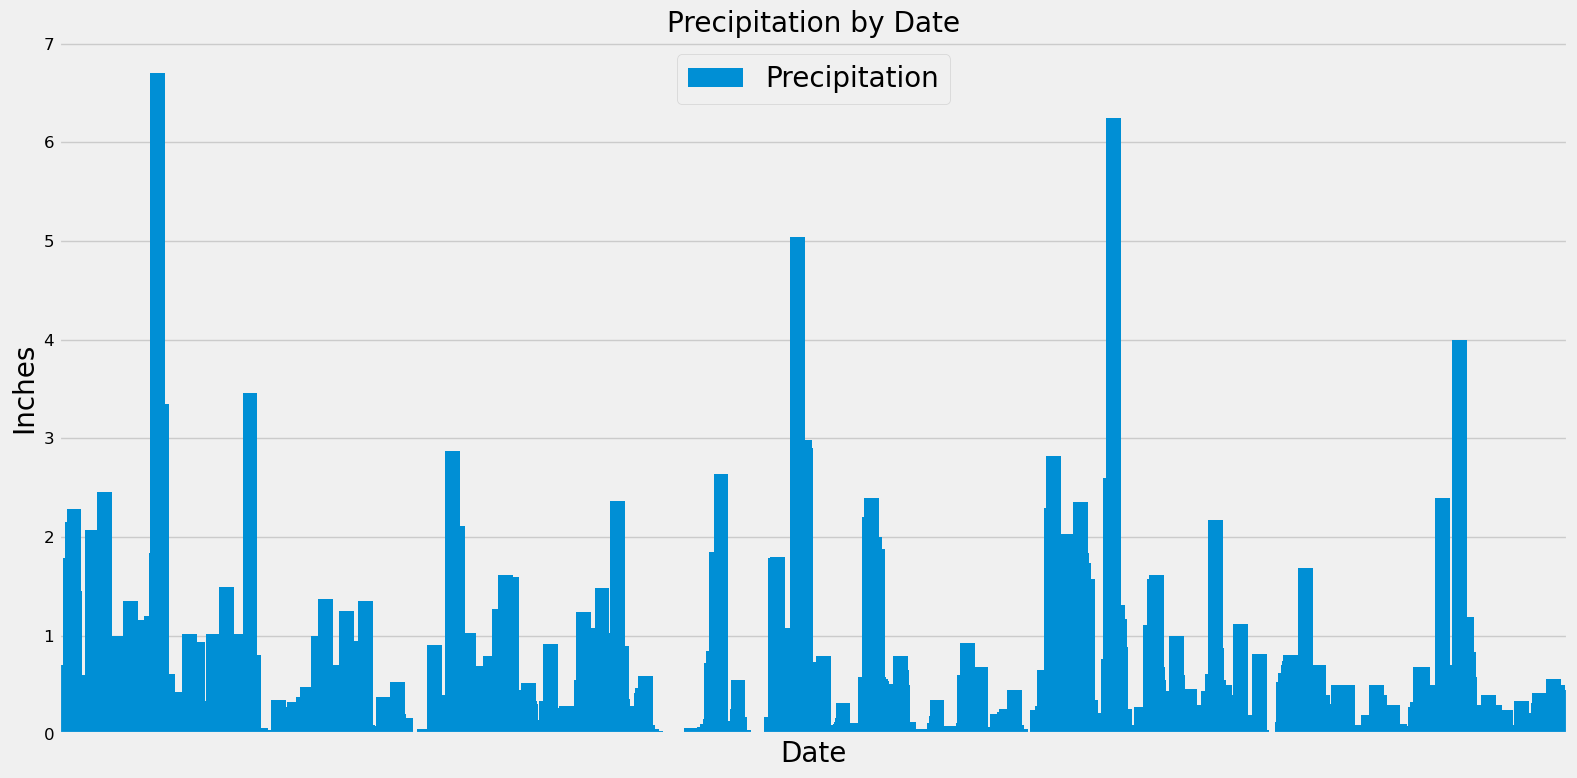

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

most_recent_date = session.query(func.max(Measurement.date)).filter(Measurement.station == most_active_station_id).scalar()
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

start_date = dt.datetime(most_recent_date.year - 1, last_date.month, last_date.day).date()

precip_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precip_score, columns = ["Date", "Precipitation"]).set_index("Date").dropna()

# place results in dataframe

precip_df = precip_df.sort_values("Date")

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(kind="bar", width=20, title="Precipitation by Date",
               figsize=(16,8), legend=True, fontsize=12, grid=True)
plt.legend(loc='upper center', fontsize='20')

# Remove xtick for every data measurement.
# there are thousands and it gets messy
plt.xticks([])

plt.xlabel("Date", fontsize=20)
plt.ylabel("Inches", fontsize=20)

plt.tight_layout()
plt.show()    
    

In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [80]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(Station.id).count()

total_station

9

In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [110]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_station[0]

# Query to calculate the lowest, highest, and average temperature for the most active station
session.query()

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

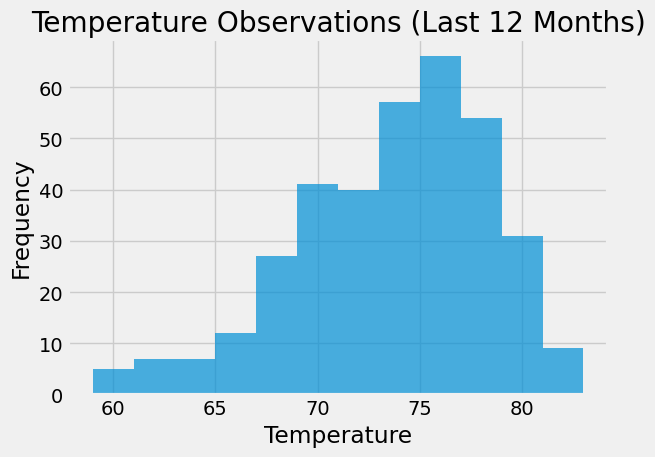

In [111]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_results = session.query(Measurement.tobs).\
                filter(Measurement.station == most_active_station_id).\
                filter(Measurement.date >= one_year_ago).all()

temperature_observations = [result[0] for result in t_results]

# Check if temperature observations are available
if temperature_observations:
    # Plot the histogram
    plt.hist(temperature_observations, bins=12, alpha=0.7)
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.title('Temperature Observations (Last 12 Months)')
    plt.tight_layout()
    plt.show()
else:
    print("No temperature observations available for the specified date range.")

# Close Session

In [112]:
# Close Session
session.close()